<a href="https://colab.research.google.com/github/gcochlar/COVID19_Predict_ICU/blob/main/TCC_COVID_UTI_HSL_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/Banner_Bootcamp.png'>

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/LogoHSL.png' width=99% height=35%>


# **COVID-19: ANÁLISE PREDITIVA DAS INTERNAÇÕES EM UTI NO HOSPITAL SÍRIO-LIBANÊS**

## **ESTRUTURA DO PROJETO**
---

1. [CONTEXTO](#contexto)
2. [AMBIENTE e DADOS](#dados)
3. [LIMPEZA e PREPARAÇÃO DOS DADOS](#limpeza)
4. [ANÁLISE EXPLORATÓRIA](#explora)
5. [TESTES DE MODELOS](#testes)
6. [APLICANDO O MELHOR MODELO](#melhor)
7. [CONCLUSÃO e PRÓXIMOS PASSOS](#conclusao)
8. [REFERÊNCIAS e DOCUMENTAÇÃO](#docs)

<a name='contexto'></a>
## **1. CONTEXTO**
---

A epidemia de **COVID-19** tomou o mundo inteiro de surpresa, com especial efeito no sistema de saúde como um todo.

A súbita escalada na demanda por atendimento médico exigiu uma resposta rápida por parte dos gestores, uma vez que as medidas de contenção de circulação das pessoas levariam algum tempo para surtir efeito.

Nessa situação, os esforços para o "achatamento da curva" tinham como principal objetivo fazer com que o número de casos não ultrapassasse a estrutura existente e permitir que essa mesma estrutura fosse aumentada onde fosse mais necessária.

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/CurvaCOVID.gif' allign='right'>

Dentro dos diversos setores impactados, um dos mais críticos foi o das UTIs (Unidades de Terapia Intensiva). Além do aumento de casos, muitos pacientes infectados apresentaram necessidade de cuidados intensivos por mais tempo do que os hospitais estão habituados a oferecer.

Além disso, diversos hospitais não tinham locais adequados para garantir as condições exigidas para a instalação de novos leitos especializados e, aqueles que tinham espaço disponível, tiveram dificuldades para encontrar os profissionais habilitados ou para obter os suprimentos necessários.

Diante desse cenário, a necessidade de melhor prever a possibilidade de internações em UTIs para permitir o planejamento de ocupação e redirecionamento de pacientes cresceu exponencialmente.

O **Hospital Sírio-Libanês**, através de sua equipe de *Data Science*, trabalhou para montar um modelo de predição de necessidade de leitos de UTI com base nos dados clínicos dos pacientes admitidos com confirmação de **COVID-19**.

Esse time recebeu duas tarefas a serem cumpridas e esse desafio foi compartilhado no ***Kaggle***, plataforma que reúne a comunidade de *data scientists* e *machine learners* para troca de experiências.

&nbsp;

**TAREFA 1:** Prever a internação em UTI de casos confirmados de **COVID-19**.

Baseado nos dados disponíveis, é factível prever quais pacientes irão necessitar de internação na unidade de tratamento intensivo? O objetivo é disponibilizar ao hospital e parceiros respostas o mais acuradas possíveis para que os recursos de UTI sejam providenciados ou a transferência do paciente seja agendada.

>>**TASK 1:** *Predict admission to the ICU of confirmed COVID-19 cases.*
>>
>>*Based on the data available, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide tertiary and quarternary hospitals with the most accurate answer, so ICU resources can be arranged or patient transfer can be scheduled.*

&nbsp;

**TAREFA 2:** Prever a **NÃO** internação em UTI de casos confirmados de **COVID-19**.

Baseado nos dados disponíveis, é factível prever quais pacientes irão necessitar de internação na unidade de tratamento intensivo? O objetivo é disponibilizar para hospitais locais e temporários uma resposta suficiente, para que médicos da linha de frente possam dispensar esses pacientes e fazer acompanhamento remoto de sua evolução.


>>**TASK 2:** *Predict **NOT** admission to the ICU of confirmed COVID-19 cases.*
>>
>>*Based on the subsample of widely available data, is it feasible to predict which patients will need intensive care unit support?
The aim is to provide local and temporary hospitals a good enough answer, so frontline physicians can safely discharge and remotely follow up with these patients.*

&nbsp;

## **É em cima desse desafio proposto e suas tarefas que o presente estudo foi baseado.**

<a name='dados'></a>
## **2. AMBIENTE e DADOS**
---

Os dados a serem utilizados foram disponibilizados na plataforma [Kaggle](https://www.kaggle.com), em página específica para o desafio ([aqui](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19/)).

Para garantir a reprodutibilidade do estudo, caso os dados sejam alterados, os mesmos foram colocados no presente repositório do **GitHub**, de onde serão importados para serem trabalhados e analisados.

Vamos começar importando todas as bibliotecas que serão necessárias bem como o *dataset* originalmente disponibilizado.

**$\color{red}{\text{IMPORTANTE:}}$** Esse notebook faz uso de funções disponibilizadas a partir da versão 3.4.2 da biblioteca **`matplotlib`**, que ainda não é a versão padrão utilizada no **Google Colab**. Por isso, caso identifique que a versão presentemente instalada é inferior à necessária, o notebook irá fazer a atualização, mas será necessário reinicializar a máquina virtual e pedir para **$\color{red}{\text{rodar novamente o notebook!!!}}$**

In [1]:
import matplotlib
versao_mtplt = matplotlib.__version__
versao_minima = '3.4.2'

if versao_mtplt < versao_minima:
    !pip install matplotlib --upgrade
    for _ in range(1,6):
        print('Atualizado a versão do matplotlib!')
        print('Reinicie o ambiente e rode o notebook novamente!!!')

In [2]:
## IMPORTANDO AS BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy.stats import randint

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.tree import export_graphviz
#from sklearn.tree import export_text
#import graphviz

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
mpl.rcParams['figure.figsize'] = (12,6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
## IMPORTANDO OS DADOS

url = 'https://github.com/gcochlar/COVID19_Predict_ICU/blob/main/data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'

dados_brutos = pd.read_excel(url)
dados = dados_brutos.copy()
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

<a name='limpeza'></a>
## **3. LIMPEZA e PREPARAÇÃO DOS DADOS**
---

A documentação a respeito da estrutura do *dataset* pode ser encontrada [aqui](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19/).

A estrutura encontrada pode ser assim descrita:
* Identificação do paciente e janela de medição dos sinais (2 variáveis)
* Informações Demográficas (3 variáveis)
* Grupos de Doenças Prévias (9 variáveis)
* Resultados de Exames de Sangue (36 variáveis)
* Sinais Vitais (6 variáveis)
* Indicação de Internação em UTI (variável resultado)

As 42 variáveis contínuas (exames de sangue e sinais vitais) já foram normalizadas para apresentar resultados entre -1 e 1 e contam com colunas com valores estatísticos (*mean*, *median*, *max*, *min*, *diff* e *relative diff*), pois podemos ter mais de uma medição dentro de uma mesma janela horária.

A janela de medição dos sinais agrupa o conjunto de medições feitas para um paciente, o que contribui para a anonimização dos dados. Estão distribuídas da seguinte forma:
* '0-2' : Até 2 horas após a admissão do paciente
* '2-4' : Entre 2 e 4 horas da admissão do paciente
* '4-6' : Entre 4 e 6 horas da admissão do paciente
* '6-12': Entre 6 e 12 horas da admissão do paciente
* 'Above-12' : Acima de 12 horas após a admissão do paciente

A documentação informa ainda que os dados nas janelas de medição em que tivermos **`'ICU' = 1`**, ou seja, o paciente está na UTI, deverão ser desprezados, pois a medição pode ter ocorrido depois da transferência, perdendo seu efeito preditivo.

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/windows_0.png'>

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/windows_1.png'>

Vamos começar a preparação dos dados para que os modelos de *Machine Learning* possam ser aplicados.

Primeiramente vamos transformar a variável `AGE_PERCENTIL` em categórica numérica, para poder ser utilizada pelos modelos.

Depois iremos criar a coluna `ICU_Final`, que vai ser o **Y** do nosso modelo. Essa coluna identifica os pacientes que, em algum momento, tiveram que ser transferidos para a UTI.

In [4]:
## TRANSFORMA AGE_PERCENTIL
le = preprocessing.LabelEncoder()
dados.AGE_PERCENTIL = le.fit_transform(dados.AGE_PERCENTIL)

## CRIA ICU_final
lista_icu = dados[['PATIENT_VISIT_IDENTIFIER','ICU']].groupby('PATIENT_VISIT_IDENTIFIER').max()
lista_icu.columns = ['ICU_final']

dados = pd.merge(dados, lista_icu, how='left', left_on='PATIENT_VISIT_IDENTIFIER', right_on='PATIENT_VISIT_IDENTIFIER')
dados_brutos = pd.merge(dados_brutos, lista_icu, how='left', left_on='PATIENT_VISIT_IDENTIFIER', right_on='PATIENT_VISIT_IDENTIFIER')

Agora, atendendo à documentação, vamos remover todas as medições que foram feitas no mesmo período em que o paciente entrou na UTI ou já estava lá, pois essas não vão ter efeito preditivo.


In [5]:
## REMOVE MEDIÇÕES REALIZADAS JÁ NA UTI (POSSIVELMENTE)
a_remover = dados.query('ICU == 1 and ICU_final == 1').index

dados_pre = dados.query('index not in @a_remover').drop('ICU', axis=1)

A partir de agora tenho uma grande diferença em relação ao que vimos ao longo do curso e acho que cabe um esclarecimento especial para não passar desapercebido.

---
#### **$\color{blue}{\text{ESCLARECIMENTO ESPECIAL}}$**

---

>O entendimento de que a necessidade do hospital é identificar com o máximo de antecedência se o paciente que está ingressando no hospital irá precisar de cuidados intensivos nos levou a, em um primeiro momento, desprezar todas as medições feitas em janelas temporais posteriores. Conservamos somente a janela de entrada (0-2h) e desconsideramos os dados posteriores.
>
>Isso reduziu ainda mais a quantidade de dados já limitados que fornecemos aos modelos de *Machine Learning*, trazendo resultados de baixa acurácia preditiva.
>
>O meu entendimento é que podemos tratar as diversas janelas de medição de um paciente como se fossem pacientes diferentes, aumentando a informação que dispomos para treinar nosso modelo.
>
>A lógica por trás desse raciocínio é que podemos ter, por exemplo, as duas situações abaixo:
>
>* **PACIENTE A:** vai para o hospital logo que tem os primeiros sintomas, passa por diversas janelas de medição mas acaba tendo que ser transferido para a UTI na última janela (acima de 12h).
>
>* **PACIENTE B:** reluta em se dirigir ao hospital, passa pelos primeiros sintomas em casa, sem medições. Quando se dirige ao hospital, em sua primeira medição de sinais já está com o mesmo quadro que o paciente A apresentava na janela de 4-6h, por exemplo. Esse paciente acaba indo para a UTI antes de fechar 12h de internação.
>
>Se desprezarmos os dados posteriores à janela inicial, perderíamos a possibilidade de enxergar essa relação entre os dois pacientes, que nos daria indícios de que o paciente B também iria precisar de transferência para a UTI.
>
>Sendo assim, depois de fazer o preenchimento das lacunas em nossa base e desprezar o que ainda tivermos de dados inválidos, vamos eliminar as colunas de identificação de paciente e de janela de medição, pois iremos tratar cada linha de nosso *dataset* como sendo um paciente diferente.
>
>Isso vai nos permitir trabalhar com uma maior massa de dados.

---
---

Vamos então definir a função que fará o preenchimento de lacunas nas variáveis contínuas de nosso *dataset*, pois algumas medições não foram feitas e para submeter os dados aos modelos de *Machine Learning* precisamos que eles estejam completos.

O método utilizado para preenchimento foi o **`fillna`**, sendo que usamos primeiro o *forward fill*, propagando os dados anteriores para as lacunas e depois aplicando o *back fill*, trazendo os dados posteriores.

Como já eliminamos as linhas de dados em que as medições foram feitas na mesma janela em que o paciente foi para a UTI, não corremos o risco de aproveitar indevidamente esses dados.



In [6]:
def preenche_tabela(dados):
    var_continuas_colunas = dados.iloc[:, 13:-2].columns
    var_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[var_continuas_colunas].fillna(method='ffill').fillna(method='bfill')
    var_categoricas = dados.iloc[:, :13]
    var_finais = dados.iloc[:, -2:]
    dados_finais = pd.concat([var_categoricas, var_continuas, var_finais], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

Depois de aplicada a função de preenchimento das lacunas vamos dispensar alguma linha de nosso *dataset* que ainda apresente valores inválidos e, na sequência, vamos eliminar as colunas que não terão mais utilidade em nosso modelo, a **`'PATIENT_VISIT_IDENTIFIER'`** e a **`'WINDOW'`**. Conforme vimos anteriormente, iremos tratar cada medição como sendo um paciente diferente, o que torna essas colunas desnecessárias.

In [7]:
dados_limpos = preenche_tabela(dados_pre)

dados_limpos = dados_limpos.dropna()
dados_limpos.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW'], axis = 1, inplace = True)
dados_limpos.reset_index(drop = True, inplace = True)
dados_limpos.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE_ABOVE65,1405.0,0.404982,0.491063,0.0,0.0,0.0,1.000000,1.000000
AGE_PERCENTIL,1405.0,3.920996,2.797821,0.0,1.0,4.0,6.000000,9.000000
GENDER,1405.0,0.389324,0.487771,0.0,0.0,0.0,1.000000,1.000000
DISEASE GROUPING 1,1405.0,0.096797,0.295787,0.0,0.0,0.0,0.000000,1.000000
DISEASE GROUPING 2,1405.0,0.019929,0.139806,0.0,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...
HEART_RATE_DIFF_REL,1405.0,-0.925962,0.148345,-1.0,-1.0,-1.0,-0.943956,-0.069094
RESPIRATORY_RATE_DIFF_REL,1405.0,-0.925570,0.155916,-1.0,-1.0,-1.0,-0.935484,0.401434
TEMPERATURE_DIFF_REL,1405.0,-0.899514,0.192139,-1.0,-1.0,-1.0,-0.882253,0.029497
OXYGEN_SATURATION_DIFF_REL,1405.0,-0.961759,0.126679,-1.0,-1.0,-1.0,-0.959202,0.917526


Ainda assim, temos 229 colunas em nossa base de dados. Se descontarmos as 3 variáveis demográficas e nossa variável resultado, ainda restam 225 variáveis.

Sabemos que modelos de *Machine Learning* podem apresentar tendência à ***overfitting*** quando trabalham com número excessivo de variáveis com alto grau de correlação.

Para reduzir esse risco, vamos criar uma função que irá retirar da base de dados todas as variáveis com correlação superior a um valor de corte, que estabelecemos em 95%.

In [8]:
def remove_vars_correlacionadas(dados, valor_corte):
    matriz_corr = dados.select_dtypes('float64').corr().abs()
    matriz_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k = 1).astype(np.bool))
    vars_correlacionadas = [coluna for coluna in matriz_superior.columns if any(matriz_superior[coluna] > valor_corte)]

    return dados.drop(vars_correlacionadas, axis = 1), vars_correlacionadas

In [9]:
correl_de_corte = 0.95

dados_limpos_sem_corr, vars_correlacionadas = remove_vars_correlacionadas(dados_limpos, correl_de_corte)
dados_limpos_sem_corr

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,...,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,ICU_final
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
3,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,-0.107143,0.736842,0.443299,0.0000,-0.025641,-0.500000,0.318681,0.898990,-0.076923,-0.459459,-0.313433,-0.636364,-0.275362,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,...,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836

Agora temos um *dataset* mais enxuto, pronto para ser usado em nossos modelos de *Machine Learning*. Mas antes de prosseguir, vamos analisar alguns pontos de nossa base de dados bruta.

<a name='explora'></a>
## **4. ANÁLISE EXPLORATÓRIA**
---

A análise exploratória é mais necessária quando estamos trabalhando com dados completamente desconhecidos.

No presente estudo já tivemos uma primeira fase de tratamento dos dados feita pela própria equipe do **Hospital Sírio-Libanês**. Além disso o *dataset* foi objeto de estudo e análises exploratórias durante os módulos 4 e 5 do nosso Bootcamp. Os notebooks utilizados ao longo desses módulos podem ser encontrados [aqui](https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_04/Bootcamp_Mod4_Aula05.ipynb) e [aqui](https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_05/Bootcamp_Mod5_Aula06.ipynb), com todas as anotações feitas ao longo das aulas.

No presente capítulo vamos verificar apenas algumas estatísticas básicas dos dados demográficos da base fornecida, ainda em seu estado bruto.

In [10]:
def formata_grafico(g, titulo='', tit_y='', tit_x='', max_y=275):

    plt.suptitle(titulo, fontsize=20, fontweight='bold')
    plt.xlabel(tit_x,fontsize=14, fontweight='bold')
    plt.ylabel(tit_y,fontsize=14, fontweight='bold')

    ax = g.facet_axis(0,0)

    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=12, fontweight='bold')

    plt.ylim(0,max_y)
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    plt.show()

In [11]:
resumo = dados_brutos[['PATIENT_VISIT_IDENTIFIER','GENDER','AGE_PERCENTIL', 'ICU_final']]
resumo = resumo.drop_duplicates()
resumo.set_index('PATIENT_VISIT_IDENTIFIER', inplace=True)
resumo['GENDER'] = resumo['GENDER'].map({0:'Masculino', 1:'Feminino'})
resumo['ICU_final'] = resumo['ICU_final'].map({0:'Não Internado', 1:'Internado'})

#### **4.1 Distribuição por Sexo**

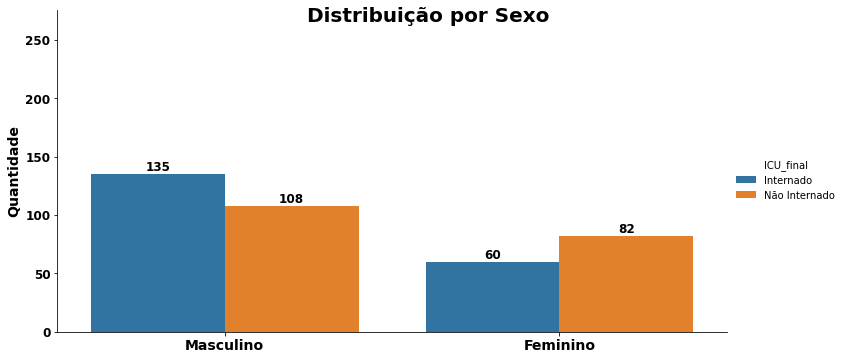

In [12]:
#fig, ax = plt.subplots(figsize=(10,5))
g = sns.catplot(x='GENDER', kind='count', data=resumo, hue='ICU_final', height=5, aspect=2)
formata_grafico(g, titulo='Distribuição por Sexo', tit_y='Quantidade')

Podemos ver uma certa desigualdade na distribuição dos pacientes por sexo, tendo maior participação masculina (243 - 63%) contra 142 (37%) pacientes do sexo feminino. Chama a atenção ainda o fato de que 58% dos pacientes do sexo feminino necessitaram de internação em UTI, o que só ocorreu com 44% dos pacientes masculinos.

#### **4.2 Distribuição por Faixa Etária**

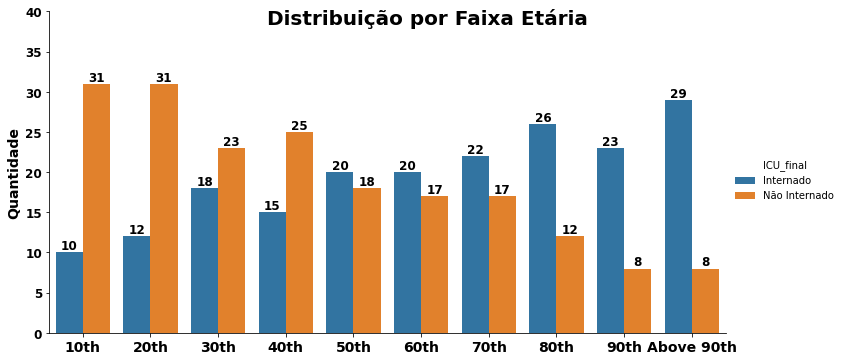

In [13]:
lista = sorted(resumo.AGE_PERCENTIL.unique())
g = sns.catplot(x='AGE_PERCENTIL', kind='count', data=resumo, hue='ICU_final', height=5, aspect=2, order=lista)
formata_grafico(g, titulo='Distribuição por Faixa Etária', tit_y='Quantidade', max_y=40)

Em relação à distribuição por faixa etária, podemos notar um certo equilíbrio na distribuição dos pacientes totais, mas chama a atenção a representação gráfica de algo que foi amplamente divulgado em campanhas de saúde:

---
>### ***O COVID-19 ataca de forma mais severa os pacientes idosos!***
---
Isso pode ser claramente observado pelo aumento das barras azuis quanto mais nos deslocamos para a direita do gráfico (maior faixa etária), sinalizando maior necessidade de internações em UTI.

Em compensação, as barras laranja, que indicam pacientes que não precisaram de internação em UTI, ficam maiores à esquerda do gráfico, onde temos os pacientes mais jovens.

<a name='testes'></a>
## **5. TESTES DE MODELOS**
---


Agora que já preparamos a base de dados que iremos usar para treinar e testar nossos modelos de *Machine Learning*, vamos estabelecer quais modelos iremos testar inicialmente, apenas com seus parâmetros *default*. Depois iremos refinar os parâmetros daqueles que apresentarem os melhores resultados.

Vamos avaliar 4 modelos e compará-los ao nosso *baseline*, que é o modelo *dummy*. Serão:
* **`DummyClassifier`**: nosso modelo *dummy* que serve de *baseline* para comparações
* **`LogisticRegression`**: modelo de Regressão Logística
* **`DecisionTreeClassifier`**: modelo de Árvore de Decisão
* **`ExtraTreesClassifier`**: modelo que gera um conjunto randômico de Árvores de Decisão
* **`RandomForestClassifier`**: modelo que gera um conjunto randômico de Árvores de Decisão

Os modelos **`ExtraTreesClassifier`** e **`RandomForestClassifier`** são semelhantes, mas divergem na maneira com que o fator aleatório é utilizado.

No **`RandomForestClassifier`** a aleatoriedade gera árvores a partir de subconjuntos das variáveis e depois, para cada árvore, busca encontrar a variável e o valor que irá permitir uma divisão mais equilibrada dentro dos dados restantes.

Já no modelo **`ExtraTreesClassifier`**, a aleatoriedade é aplicada na geração das árvores e depois novamente para selecionar os valores de separação das variáveis que irão gerar os "galhos". O modelo escolhe, entre os gerados, aquele que apresentar um melhor equilíbrio.

Os modelos randômicos, em função da aleatoriedade presente, reduzem significativamente o risco de **overfit** na parametrização do modelo.

In [14]:
mod_Dummy = DummyClassifier()
mod_LR = LogisticRegression()
mod_DT = DecisionTreeClassifier()
mod_ETC = ExtraTreesClassifier()
mod_RFC = RandomForestClassifier()

Estabelecidos os modelos que iremos trabalhar, vamos criar uma função para rodar *n* vezes cada um e assim permitir que tenhamos uma média de acurácia para compará-los, lembrando que nesse momento não faremos nenhuma alteração nos parâmetros *default*.

In [15]:
@ignore_warnings(category=ConvergenceWarning)
def roda_n_modelos(modelo, dados, n):
    x_columns = dados.columns
    y = dados['ICU_final']
    x = dados[x_columns].drop(['ICU_final'], axis = 1)

    auc_lista = []

    np.random.seed(3874541)

    for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)

        modelo.fit(x_train, y_train)
        prob_predic = modelo.predict_proba(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        auc_lista.append(auc)

    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f'Resultados após {n} execuções')
    print(f'AUC Médio {auc_medio}')
    print(f'Intervalo {auc_medio - 2 * auc_std} a {auc_medio + 2 * auc_std}')
    print(f'Range     {4 * auc_std}')

In [16]:
roda_n_modelos(mod_Dummy, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.5016226380480646
Intervalo 0.4507539831219201 a 0.5524912929742091
Range     0.10173730985228899


In [17]:
roda_n_modelos(mod_LR, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.8457525224729407
Intervalo 0.8105833749309067 a 0.8809216700149748
Range     0.07033829508406801


In [18]:
roda_n_modelos(mod_DT, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.9310104567969181
Intervalo 0.8936582654316299 a 0.9683626481622063
Range     0.07470438273057642


In [19]:
roda_n_modelos(mod_ETC, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.9947365620986975
Intervalo 0.9873026650804276 a 1.0021704591169676
Range     0.014867794036539848


In [20]:
roda_n_modelos(mod_RFC, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.9926422674738579
Intervalo 0.9842517373776709 a 1.0010327975700448
Range     0.01678106019237382


Os modelos **`ExtraTreesClassifier`** e **`RandomForestClassifier`** apresentaram resultados semelhantes e excelentes, inclusive deixando pouco espaço para melhorias.

Mas não havia expectativas de acurácias tão elevadas. Esse resultado pode ter sido provocado por uma separação benéfica dos dados de treino e teste.

Para evitar isso, vamos submeter os modelos e nossos dados a uma validação cruzada. Basicamente ela funciona da seguinte forma: nós separamos o nosso *dataset* em diversos pedaços e repetimos o *fit* do modelo diversas vezes, alternando os pedaços que usamos para treino e teste, como podemos ver na figura abaixo.

<img src='https://github.com/gcochlar/COVID19_Predict_ICU/raw/main/images/CrossValidation.JPG' width='500px' height='300px'>

Na figura exemplo, a base de dados é dividida em 5 blocos e, a cada execução, o bloco em cinza é usado para testes, obtendo acurácias diferentes. O resultado do modelo será a média das acurácias obtidas.

Vamos aproveitar o momento para também trazer um pouco de aleatoriedade na definição dos melhores parâmetros de cada modelo, usando uma nova função. Essa nova função realiza duas alterações significativas no teste dos modelos:

1. **Separação dos Dados:** vamos fazer 10 separações e 10 repetições dos dados de treino e teste, de forma aleatória. Como iremos verificar a média da acurácia obtida para os diferentes conjuntos de dados, isso diminui a chance do modelo ser favorecido ou desfavorecido pelo conjunto de dados utilizado.

2. **Parametrização:** vamos passar alguns parâmetros com intervalos de valores diferentes e pedir para modelo treinar com 10 combinações diferentes, de forma aleatória, buscando um melhor resultado.

Além dos dois modelos, vamos fazer o mesmo com o modelo de Árvore de Decisão, para efeitos de comparação.

In [21]:
def roda_modelo_RandomizedSearchCV(modelo, dados, n_splits, n_repeats, espaco_de_parametros, n_iter):

    np.random.seed(3874541)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados['ICU_final']
    x = dados[x_columns].drop(['ICU_final'], axis=1)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)

    busca = RandomizedSearchCV(modelo, param_distributions=espaco_de_parametros,
                                n_iter = n_iter, cv = cv, scoring='roc_auc',
                                return_train_score=True)
    busca.fit(x, y)

    resultados = pd.DataFrame(busca.cv_results_)

    return resultados, busca    

In [22]:
np.random.seed(3874541)
    
param_DT = {'max_depth':randint(2,25)}

param_ETC = {
    'n_estimators' :randint(100, 750),
    'max_depth' : randint(3, 15),
    'min_samples_split' : randint(2, 15),
    'min_samples_leaf' : randint(1, 10),
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']}

param_RFC = {
    'n_estimators' :randint(100, 750),
    'max_depth' : randint(3, 15),
    'min_samples_split' : randint(2, 10),
    'min_samples_leaf' : randint(1, 15),
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']}

É importante destacar que essa fase é bem demorada e pode gerar o *time out* do processamento se estiver sendo utilizado o **Google Colab**. Os tempos aproximados para processamento dos modelos abaixo são:
* **Decision Tree Classifier:** 35 segundos
* **Extra Trees Classifier:** 15 minutos
* **Random Forest Classifier:** 30 minutos

In [23]:
res_DT, busca_DT = roda_modelo_RandomizedSearchCV(mod_DT, dados_limpos_sem_corr, 10, 10, param_DT, 10)

In [24]:
res_ETC, busca_ETC = roda_modelo_RandomizedSearchCV(mod_ETC, dados_limpos_sem_corr, 10, 10, param_ETC, 10)

In [25]:
res_RFC, busca_RFC = roda_modelo_RandomizedSearchCV(mod_RFC, dados_limpos_sem_corr, 10, 10, param_RFC, 10)

Processados os modelos, vamos ver como a melhor combinação de parâmetros de cada um se comportou em termos de acurácia, tanto pelo *score* médio atingido quanto pelo desvio padrão das iterações com os diferentes conjuntos de dados para treino e teste.

In [26]:
def report(res_modelo, busca_modelo, nome_modelo):
    print(f'\n{nome_modelo}')
    auc_medio = res_modelo.iloc[busca_modelo.best_index_][['mean_test_score']][0]
    auc_std = res_modelo.iloc[busca_modelo.best_index_][['std_test_score']][0]

    print(f'AUC Médio {auc_medio}')
    print(f'Intervalo {auc_medio - 2 * auc_std} a {auc_medio + 2 * auc_std}')
    print(f'Range     {4 * auc_std}')
    with pd.option_context('max_colwidth', None):
        print(f'Parâmetros: {res_modelo.iloc[busca_modelo.best_index_][["params"]][0]}')

In [27]:
report(res_DT, busca_DT, 'Decision Tree Classifier')


Decision Tree Classifier
AUC Médio 0.9501647840693315
Intervalo 0.9070220167901923 a 0.9933075513484706
Range     0.08628553455827821
Parâmetros: {'max_depth': 23}


In [28]:
report(res_ETC, busca_ETC, 'Extra Trees Classifier')


Extra Trees Classifier
AUC Médio 0.9790489799892886
Intervalo 0.9548621658778973 a 1.00323579410068
Range     0.04837362822278278
Parâmetros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 693}


In [29]:
report(res_RFC, busca_RFC, 'Random Forest Classifier')


Random Forest Classifier
AUC Médio 0.995669604167681
Intervalo 0.9875167551532869 a 1.0038224531820752
Range     0.016305698028788333
Parâmetros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 693}


Como podemos ver pelos resultados acima, o modelo **`ExtraTreesClassifier`** piorou um pouco seus resultados com alterações nos parâmetros e deixou de ser o melhor modelo, perdendo acurácia e aumentando o desvio padrão.

O modelo  **`RandomForestClassifier`** melhorou um pouco, tanto em termos de resultado médio quanto em relação ao desvio padrão dos resultados obtidos. Com isso passou a ser o melhor modelo.

O interessante é que os parâmetros selecionados como sendo a melhor combinação foram idênticos para ambos os modelos.

O modelo **`DecisionTreeClassifier`** melhorou um pouco o seu *score* mas aumentou o desvio de padrão com o aumento de profundidade da árvore (único parâmetro alterado). Isso pode ser um indicativo de **overfit**.

Vamos plotar graficamente os resultados obtidos com as 100 iterações que foram feitas usando o melhor conjunto de parâmetros de cada modelo para analisar.

In [30]:
DT_melhor_result_teste = res_DT.iloc[busca_DT.best_index_,6:106].to_list()
ETC_melhor_result_teste = res_ETC.iloc[busca_ETC.best_index_,11:111].to_list()
RFC_melhor_result_teste = res_RFC.iloc[busca_RFC.best_index_,11:111].to_list()

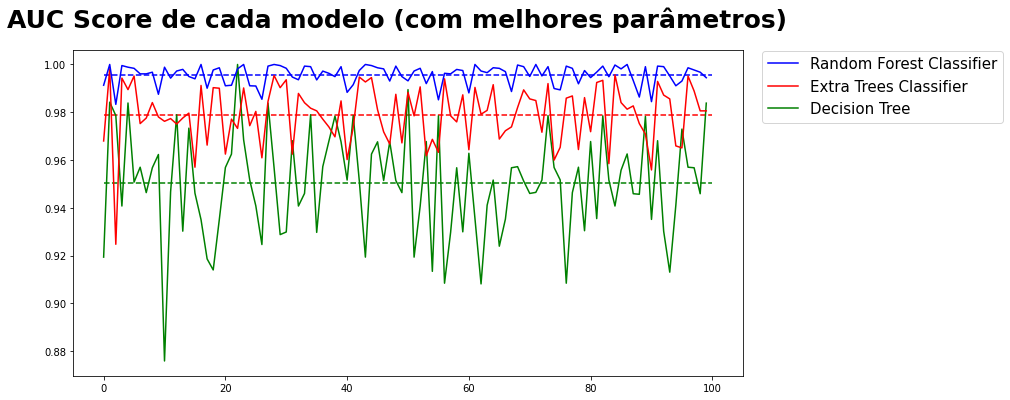

In [48]:
plt.plot(DT_melhor_result_teste, color = 'green', label='Decision Tree')
plt.hlines(np.mean(DT_melhor_result_teste), 0, 100, color='green', ls='--')

plt.plot(ETC_melhor_result_teste, color = 'red', label='Extra Trees Classifier')
plt.hlines(np.mean(ETC_melhor_result_teste), 0, 100, color='red', ls='--')

plt.plot(RFC_melhor_result_teste, color = 'blue', label='Random Forest Classifier')
plt.hlines(np.mean(RFC_melhor_result_teste), 0, 100, color='blue', ls='--')

plt.suptitle('AUC Score de cada modelo (com melhores parâmetros)', fontsize=25, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[idx] for idx in [2,1,0]],[labels[idx] for idx in [2,1,0]],
           fontsize = 15, loc='upper right',bbox_to_anchor=(1.4, 1.02))

plt.show()

Graficamente podemos ver com mais facilidade a superioridade do modelo **`RandomForestClassifier`** em dois quesitos:
* média superior, próxima aos 100% de acerto
* menor desvio padrão, visível na baixa amplitude das linhas

O pior resultado único obtido por esse modelo ainda é melhor do que a média do modelo **`ExtraTreesClassifier`**, que ficou em segundo lugar.

É interessante também observar a maior amplitude dos resultados obtidos pelo modelo **`DecisionTreeClassifier`**. Esse alto desvio padrão diminui a confiabilidade do modelo.

<a name='melhor'></a>
## **6. APLICANDO O MELHOR MODELO**
---


Vamos agora configurar o modelo **`RandomForestClassifier`** com os melhores parâmetros identificados, treiná-lo e verificar se os resultados obtidos são consistentes.

Para isso vamos começar recuperando os parâmetros utilizados no modelo que teve o melhor desempenho.

In [32]:
report(res_RFC, busca_RFC, 'Random Forest Classifier')


Random Forest Classifier
AUC Médio 0.995669604167681
Intervalo 0.9875167551532869 a 1.0038224531820752
Range     0.016305698028788333
Parâmetros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 693}


Vamos parametrizar nosso modelo final com esses valores.

In [33]:
mod_final = RandomForestClassifier(bootstrap=False, criterion='entropy',
                                 n_estimators=693,
                                 max_depth=12,
                                 min_samples_split=7,
                                 min_samples_leaf=4)

Seguindo o que fizemos anteriormente, para evitar o resultado a partir de uma única execução, vamos colocar o modelo para rodar diversas vezes e verificar o resultado médio que teremos.

In [34]:
roda_n_modelos(mod_final, dados_limpos_sem_corr, 100)

Resultados após 100 execuções
AUC Médio 0.9910882406897815
Intervalo 0.978031169684253 a 1.00414531169531
Range     0.026114142011057204


Vamos agora treinar o modelo final para deixá-lo pronto para utilização e fazer a avaliação final do seu desempenho.

In [35]:
y = dados_limpos_sem_corr['ICU_final']
x = dados_limpos_sem_corr.drop(['ICU_final'], axis = 1)

np.random.seed(3874541)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y)
mod_final.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=693,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Treinado o modelo, vamos verificar como ele se sai em termos de acurácia contra os dados de teste.

In [38]:
y_prev = mod_final.predict(x_teste)
accuracy_score(y_teste, y_prev)

0.9346590909090909

O resultado de 93% é um ótimo resultado, mas vamos abrir esse resultado para entender melhor o que o modelo errou e onde acertou.

In [40]:
print(classification_report(y_teste, y_prev))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       237
           1       0.98      0.82      0.89       115

    accuracy                           0.93       352
   macro avg       0.95      0.90      0.92       352
weighted avg       0.94      0.93      0.93       352



Olhando de maneira detalhada podemos perceber alguns pontos em nosso modelo que nos chamam a atenção.

Apesar de 93%, isso se dá em cima de um baixo resultado de ***recall*** justamente para a variável com resultado 1, ou seja, tivemos 18% de casos em que foi necessária a internação em UTI e o modelo fez a previsão de que seria desnecessário.

Vamos ver isso melhor usando a matriz de confusão, abaixo.

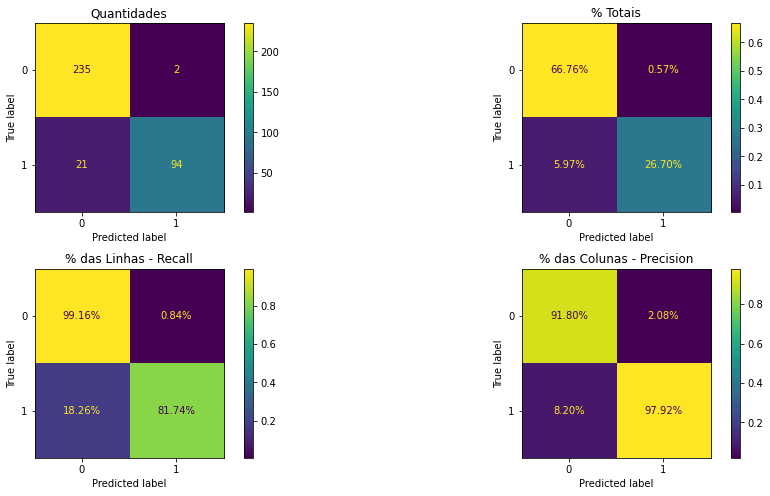

In [102]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 8))
plot_confusion_matrix(mod_final, x_teste, y_teste, ax=ax[0,0], values_format='.0f')
ax[0,0].set_title('Quantidades')
plot_confusion_matrix(mod_final, x_teste, y_teste, ax=ax[0,1], values_format='.2%', normalize= 'all')
ax[0,1].set_title('% Totais')
plot_confusion_matrix(mod_final, x_teste, y_teste, ax=ax[1,0], values_format='.2%', normalize= 'true')
ax[1,0].set_title('% das Linhas - Recall')
plot_confusion_matrix(mod_final, x_teste, y_teste, ax=ax[1,1], values_format='.2%', normalize= 'pred')
ax[1,1].set_title('% das Colunas - Precision')
plt.subplots_adjust(hspace = 0.3)
plt.show()

Graficamente fica mais fácil de entender.

Olhando o gráfico de ***recall*** (embaixo, à esquerda) podemos ver que o modelo acertou 99% dos casos em que o paciente poderia ser liberado, mas só acertou 82% dos casos em que o paciente precisaria de uma internação em UTI.

Isso significa que tivemos 2 casos de falso positivo, mas tivemos 21 casos de falso negativo, o que poderia levar a um subdimensionamento da estrutura de UTI.

Vamos verificar como ficou o desempenho do modelo usando a métrica ROC e da área sob a curva (AUC), comparando com o desempenho dos modelos *Dummy* e de Regressão Logística.

In [36]:
prob_predic = mod_final.predict_proba(x_teste)
auc = roc_auc_score(y_teste, prob_predic[:,1])
auc

0.9893230599889928

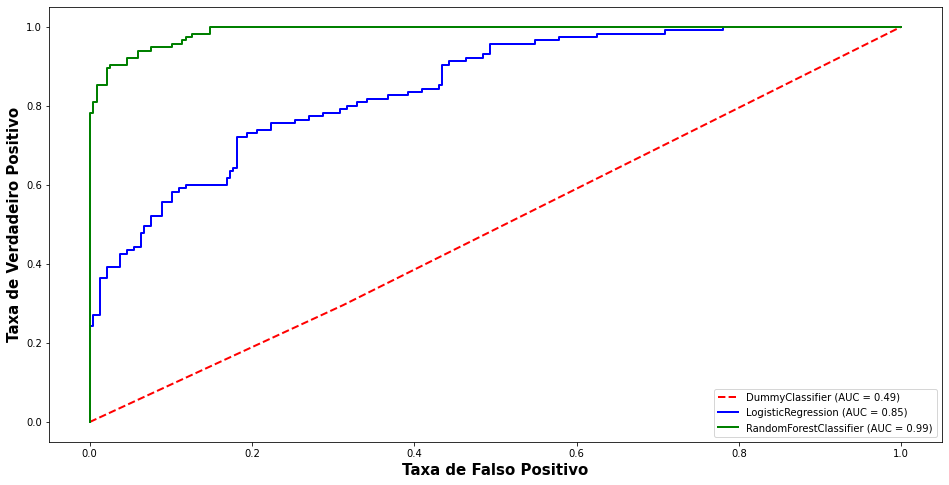

In [91]:
fig, ax = plt.subplots(figsize = (16,8))
np.random.seed(3874541)
plot_roc_curve(mod_Dummy, x_teste, y_teste, ax=ax, color='red', ls='--', lw=2)
plot_roc_curve(mod_LR, x_teste, y_teste, ax=ax, color='blue', ls='solid', lw=2)
plot_roc_curve(mod_final, x_teste, y_teste, ax=ax, color='green', ls='solid', lw=2)
plt.xlabel('Taxa de Falso Positivo', fontsize=15, fontweight='bold')
plt.ylabel('Taxa de Verdadeiro Positivo', fontsize=15, fontweight='bold')
plt.show()

Essa métrica de desempenho nos indica um modelo quase perfeito, com baixíssimo índice de erros, mas como vimos anteriormente, isso não é bem verdade.

Vamos buscar uma métrica mais indicada para modelos de classificação binária.

O Coeficiente de Correlação de Matthews leva em consideração os resultados certos e errados, tanto dos valores positivos quando dos negativos. Ele varia entre -1 (previsão inversa) até 1 (previsão perfeita).

In [49]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_teste, y_prev)

0.8519037066452709

Tivemos um resultado bem alto para o Coeficiente de Correlação de Matthews.

Com isso considero que o modelo está pronto para avançar aos próximos passos.

Vamos verificar quais foram as variáveis consideradas mais importantes pelo nosso modelo, para classificar os nossos pacientes.

In [52]:
importances = mod_final.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in mod_final.estimators_], axis=0)
lista_vars = x_treino.columns


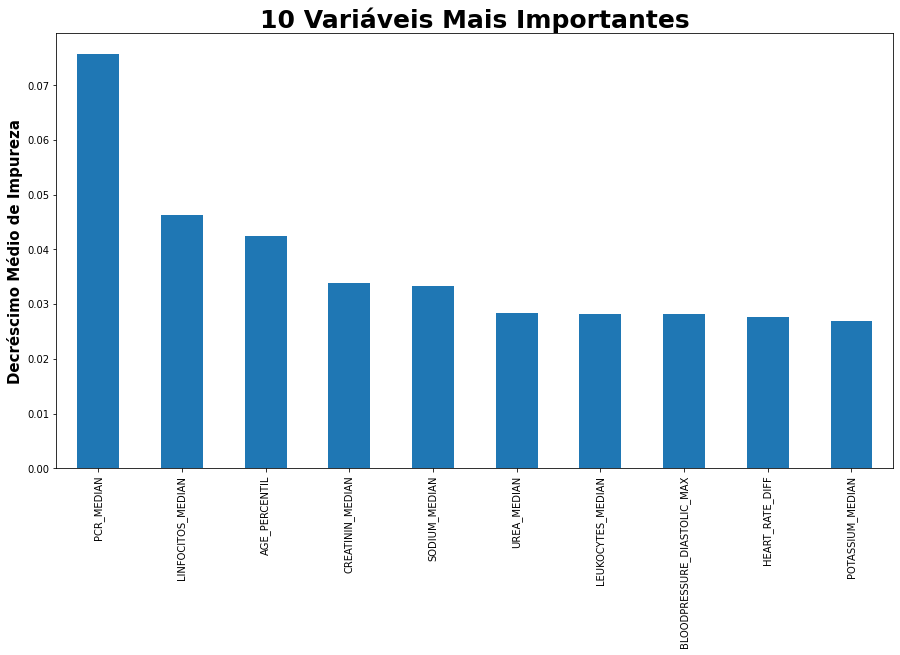

In [134]:
forest_importances = pd.Series(importances, index=lista_vars)

fig, ax = plt.subplots(figsize=(15,8))
forest_importances.sort_values(ascending=False)[:10].plot.bar(ax=ax)
ax.set_title('10 Variáveis Mais Importantes', fontsize=25, fontweight='bold')
ax.set_ylabel('Decréscimo Médio de Impureza', fontsize=15, fontweight='bold')
plt.show()

In [135]:
print(f'{len(forest_importances)} variáveis no modelo')
#print('\n')
print(f'{"{:.2%}".format(forest_importances.sort_values(ascending=False)[:16].sum())} concentrados nas 16 variáveis mais importantes.')
print(f'{len(forest_importances[forest_importances == 0.0])} variáveis consideradas com importância ZERO')


106 variáveis no modelo
50.75% concentrados nas 16 variáveis mais importantes.
36 variáveis consideradas com importância ZERO


Considerando que tivemos mais de 100 variáveis para serem trabalhadas pelo modelo, se tivéssemos uma distribuição equilibrada de importância, cada uma deveria responder por algo em torno de 1% do resultado.

Mas não é isso que podemos ver no gráfico acima. A variável mais importante passa de 7% em importância e, se somarmos as primeiras 16 variáveis já ultrapassamos os 50%.

O modelo considera ainda que temos 36 variáveis com importância **ZERO** para obtenção dos resultados preditivos e poderiam ser retiradas de nossa base de dados, simplificando o modelo.

<a name='conclusao'></a>
## **7. CONCLUSÃO e PRÓXIMOS PASSOS**
---


Voltando aos objetivos iniciais do estudo, vamos recuperar as duas tarefas propostas pelo desafio do HSL no Kaggle.

>>**TAREFA 1:** Prever a internação em UTI de casos confirmados de **COVID-19**.
>
>Baseado nos dados disponíveis, é factível prever quais pacientes irão necessitar de internação na unidade de tratamento intensivo? O objetivo é disponibilizar ao hospital e parceiros respostas o mais acuradas possíveis para que os recursos de UTI sejam providenciados ou a transferência do paciente seja agendada.

>>**TAREFA 2:** Prever a **NÃO** internação em UTI de casos confirmados de **COVID-19**.
>
>Baseado nos dados disponíveis, é factível prever quais pacientes irão necessitar de internação na unidade de tratamento intensivo? O objetivo é disponibilizar para hospitais locais e temporários uma resposta suficiente, para que médicos da linha de frente possam dispensar esses pacientes e fazer acompanhamento remoto de sua evolução.

Baseado nos resultados do modelo final, acredito que tivemos um desempenho melhor na **TAREFA 1**, até porque, no meu entender, ela gera menos risco. **Explico:** a tarefa era para conseguir dimensionar a necessidade de UTIs e, de 115 casos em que seria necessária a internação, o modelo previu 94 (mais 2 falsos positivos). Teríamos a falta de 19 leitos.

Já a **TAREFA 2**, que envolvia a possibilidade de liberação de pacientes para acompanhamento remoto, apresentou um erro menor (dos 256 casos liberados, 21 iriam precisar de UTI) mas que poderia se mostrar mais comprometedor a partir do momento que esses pacientes precisassem retornar ao hospital, já num estado mais avançado da doença.

Concluído o estudo, acredito termos um modelo robusto o suficiente para avançarmos com os próximos passos.

**PRÓXIMOS PASSOS:**

Vejo que poderíamos prosseguir, a partir de agora, em duas frentes paralelas:

1. Recuperar uma maior quantidade de dados do período que passou desde o lançamento do desafio e verificar se o modelo mantém a consistência ou se irá precisar de maiores ajustes.

2. Revisar o modelo em relação a essas variáveis que foram desconsideradas na hora de fazer as classificações, pois a simplificação do modelo deve melhorar seu desempenho, pelo menos em termos de processamento.

In [136]:
import joblib

filename = 'modelo_final_jl.sav'
joblib.dump(mod_final, filename)

dados_limpos_sem_corr.to_csv('dados_limpos_sem_corr.csv')
forest_importances.to_excel('forest_importances.xlsx')

<a name='docs'></a>
## **8. REFERÊNCIAS e DOCUMENTAÇÃO**
---

* [Kaggle](https://www.kaggle.com)
* [Flowing Data](https://flowingdata.com/2020/03/09/flatten-the-coronavirus-curve/?fbclid=IwAR3sG7Mkre45ZOQMH-xwWhKZzgRF6PJfydjezgPR8mS8BJ-DuwNqBHTjdUM)
* [Notebooks do Bootcamp](https://github.com/gcochlar/Bootcamp_DataScience)
* Sem esquecer todo o material disponibilizado pela Alura ao longo do Bootcamp

&nbsp;

**BIBLIOTECAS UTILIZADAS**

* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)
* [SciPy](https://scipy.org/)
* [SciKit-Learn](https://scikit-learn.org/stable/)
* [Joblib](https://joblib.readthedocs.io/en/latest/)

In [43]:
import matplotlib
import scipy
import sklearn

print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do matplotlib -> %s' % matplotlib.__version__)
print('Versão do scipy -> %s' % scipy.__version__)
print('Versão do sklearn -> %s' % sklearn.__version__)

Versão do pandas -> 1.1.5
Versão do numpy -> 1.19.5
Versão do matplotlib -> 3.4.2
Versão do scipy -> 1.4.1
Versão do sklearn -> 0.22.2.post1


In [44]:
!pip freeze >requirements.txt